# <center> Members of the project :   Mostafa Alaywan + Amine Dahane

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score ,roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import AdaBoostClassifier

# <center>Data Preprocessing 

In [ ]:

# Import Data : 
# ---------------------

cancer = pd.read_csv("breastcancer.csv")

print("*"*80)

cancer.info()

print("*"*80)

cancer.head()

In [ ]:
# checking for missing data 
# ----------------------------

cancer.isna().sum()

In [ ]:
cancer.describe().T

In [ ]:
cancer['diagnosis'].value_counts()

In [ ]:
# Coding the target variable : Diagnosis 
# ----------------------------------------

cancer['diagnosis'] = cancer['diagnosis'].map({"M":1 , "B":0 })
cancer['diagnosis'].value_counts()

In [ ]:
#      Splitting  Data 
# --------------------------

X = cancer.drop(['id','diagnosis'] , axis = 1 )
y = cancer['diagnosis']

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3,
                                                      stratify = y , 
                                                      random_state = 1)

In [ ]:
# Scaling data
# --------------
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_train = pd.DataFrame(X_train)

X_test = scaler.transform(X_test)

X_test = pd.DataFrame(X_test)

# <center>   (1)    AdaBoost Based on Decision Tree Predictor 

### <center>Adaboost hyperparameter tuning with decision tree as a base learner using GridSeachCV Algorithm

In [ ]:

# Create the base estimator 
# -------------------------------
ada_tree = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(  max_depth=3,  random_state = 1), random_state = 1)


ada_tree_param = {'base_estimator__max_depth': [3,4,5,6] , 
                  
                 'n_estimators': [10, 100],
                 'learning_rate': [0.01, 1]}

ada_tree_grid = GridSearchCV(estimator = ada_tree ,
                             param_grid = ada_tree_param , 
                             #cv= 5 , 
                             verbose = 1 )

# Fitting the grid
# -------------------
ada_tree_model = ada_tree_grid.fit(X_train , y_train)


In [ ]:
print("The Best Parameters For AdaBoost Classifier based on Decision Tree Predictor :")
print("-"*80)
for hyper_name , hyper_value in ada_tree_model.best_params_.items():
    print("{:} : {}".format(hyper_name , hyper_value))
    
print("-"*80)

print("The Best Score: {: .3f}".format(ada_tree_model.best_score_))


### <center>Fitting The Tuned Tree AdaBoost 

In [ ]:
final_ada_tree = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3 , random_state=1),
                                  n_estimators = 70 , 
                                   learning_rate = 0.9 , 
                                   random_state = 1)

final_ada_tree.fit(X_train , y_train)

# The Accuracy of Test Set : 
score_test = final_ada_tree.score(X_test , y_test )
print("the accuracy : {:.4f}".format(score_test))
print("-"*20)

# The AUC Score : 
y_preds_proba = final_ada_tree.predict_proba(X_test)[:,1]

# Evaluate the Area Under Curve (AUC) on test set 
print("ROC AUC Score :{: .4f}".format(roc_auc_score(y_test , y_preds_proba)))

In [ ]:
y_pred = final_ada_tree.predict(X_test)
target_names = ["class 0 " , "class 1 "]
print(classification_report(y_test , y_pred , target_names = target_names))

# <center>AdaBoost Based on Logistic Regression Predictor 

### <center>Adaboost hyperparameter tuning with Logistic Regression as a base learner using GridSeachCV Algorithm

In [ ]:

# Create the base estimator 
# -------------------------------

ada_logreg = AdaBoostClassifier(base_estimator = LogisticRegression(random_state = 1), random_state = 1)

ada_logreg_params = {'base_estimator__C' : np.linspace(25 , 200 , 8) , 
                     'learning_rate': np.linspace(0.1 , 0.9 , 8)}

ada_logreg_grid = GridSearchCV(estimator = ada_logreg , 
                              param_grid = ada_logreg_params , 
                              cv = 5 , 
                              verbose = 1)


# Fitting the grid
# -------------------

ada_logreg_model = ada_logreg_grid.fit(X_train , y_train)

In [ ]:
ada_logreg_model.best_params_

In [ ]:
ada_logreg_model.best_score_

### <center>Fitting The Tuned Logistic Regression  AdaBoost

In [ ]:
final_ada_logreg = AdaBoostClassifier(base_estimator = LogisticRegression(random_state = 1 , C = 50) , 
                                      learning_rate =  0.1 ,
                                      random_state = 1)

final_ada_logreg.fit(X_train , y_train)

score_test= final_ada_logreg.score(X_test , y_test)
print(score_test)

y_preds_proba = final_ada_logreg.predict_proba(X_test)[:,1]

# Evaluate the Area Under Curve (AUC) on test set 
print("ROC AUC Score :{: .4f}".format(roc_auc_score(y_test , y_preds_proba)))


### Classification Repport 

In [ ]:
y_pred = final_ada_logreg.predict(X_test)
target_names = ["class 0 " , "class 1 "]
print(classification_report(y_test , y_pred , target_names = target_names))

#  <center>AdaBoost Based on Suport Vector Predictor 

### <center>Adaboost hyperparameter tuning with Support Vector Machine as a base learner using GridSeachCV Algorithm

In [ ]:

# Create the base estimator 
# -------------------------------

ada_svm = AdaBoostClassifier(base_estimator = SVC(probability = True , kernel = 'linear') , random_state = 1 )

ada_svm_params = {'base_estimator__C':np.linspace(25 , 200 , 8) ,
                  'learning_rate': np.linspace(0.1 , 0.9 , 8) }

ada_svm_grid = GridSearchCV(estimator = ada_svm , 
                           param_grid = ada_svm_params , 
                           cv = 5 )


# Fitting the grid
# -------------------

ada_svm_model = ada_svm_grid.fit(X_train , y_train)

### <center>Fitting The Tuned Support Vector Machine AdaBoost

In [ ]:
final_ada_svm = AdaBoostClassifier(base_estimator = SVC(probability = True,
                                                        kernel = 'linear' ,
                                                        C = 75 ,
                                                        random_state = 1) , 
                                      learning_rate =  0.1 ,
                                      random_state = 1)

final_ada_svm.fit(X_train , y_train)

score_test_svm = final_ada_svm.score(X_test , y_test)
print(score_test)

y_preds_proba = final_ada_svm.predict_proba(X_test)[:,1]

# The Area Under Curve (AUC) on test set based on the Support Vector Machine Classifier 
print("ROC AUC Score :{: .4f}".format(roc_auc_score(y_test , y_preds_proba)))

In [ ]:
y_pred = final_ada_svm.predict(X_test)
target_names = ["class 0 " , "class 1 "]
print(classification_report(y_test , y_pred , target_names = target_names))

# <center>Ensemble Classifier 

In [ ]:
classifiers = [("Decision Tree", final_ada_tree ),
               ("Logistic Regression" , final_ada_logreg),
               ("Support Vector Machine" , final_ada_svm )]

for classification_method , classifier in classifiers :
    classifier.fit(X_train , y_train)
    
    y_pred = classifier.predict(X_test)
    
    print("{:s} : {:.4f}".format(classification_method , accuracy_score(y_pred, y_test)))
    print("-"*70)
    
vc = VotingClassifier(estimators = classifiers )


# fit the "vc" to the training set : 
# ------------------------------------

vc.fit(X_train , y_train) 

# 
y_pred = vc.predict(X_test)
score = accuracy_score(y_pred , y_test)
print("The Accuracy Score of the Ensemble Classifier is {:.4f}".format(score))
print("-"*70)


# Confusion Matrix on Test Set 
#------------------------------

confusion_matrix(y_pred , y_test)



In [ ]:
y_pred = vc.predict(X_test)
target_names = ["class 0 " , "class 1 "]
print(classification_report(y_test , y_pred , target_names = target_names))

#   <center> (4)    Random Forest

In [4]:
# Instantiate a random forests classifier 'rf_reg'
# ----------------------------------------------
rf_cla = RandomForestClassifier (random_state= 1)

# Fit the tree classifier 
# ----------------------
rf_cla.fit(X_train, y_train)


# The accuracy of tuned model
# ---------------------------
print("*"*40)
print('The Tuned model accuracy is: {:.4}'.format(
    (rf_cla.score(X_test,y_test)))
     )
print("*"*40)

# The Tuned model AUC score
# -------------------------
y_pred_rf_cla = rf_cla.predict_proba(X_test)

fpr_rf_cla, tpr_rf_cla, thresholds = roc_curve(y_test, y_pred_rf_cla[:,1])

auc_rff_cla = auc(fpr_rf_cla, tpr_rf_cla)

print ('The Tuned Random forest AUC Score is: {:.4f}'.format(auc_rff_cla))
print("*"*40)

****************************************
The Tuned model accuracy is: 0.9357
****************************************
The Tuned Random forest AUC Score is: 0.9880
****************************************


In [5]:
# Import Data : 
# ---------------------

cancer = pd.read_csv("breastcancer.csv")

print("*"*80)

cancer.info()

print("*"*80)

cancer.head()


********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   id                       569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13 

,diagnosis,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
features = ['diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'fractal_dimension_worst', 'area_worst']
for name, score in zip(features, rf_cla.feature_importances_):
    print("{0:26}: {1:.3f}".format(name, score))

diagnosis                 : 0.065
radius_mean               : 0.019
texture_mean              : 0.054
area_mean                 : 0.038
compactness_mean          : 0.007
concavity_mean            : 0.005
fractal_dimension_worst   : 0.076
area_worst                : 0.095


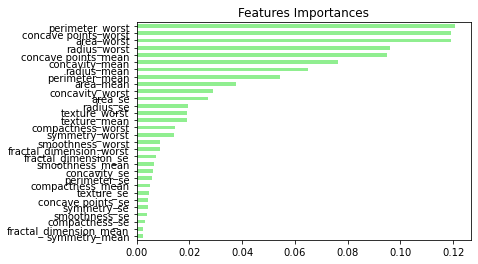

In [7]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_cla.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightgreen',
                        kind='barh')
plt.title('Features Importances')
plt.show()

In [8]:
## ==========================================================
#   Random Forest classifier Hyperparameter tuning In Action
## ==========================================================

# Import GridSearchCV
#----------------------
from sklearn.model_selection import GridSearchCV

# Instantiate a tree regressor
# ----------------------------
rf_cla = RandomForestClassifier(random_state= 1)

# Define the dictionary 'params_rf_reg'
params_rf_cla = {
    'n_estimators': [100, 350, 500], 
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Import GridSearchCV
# ------------------------
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf_reg
grid_rf_cla = GridSearchCV(estimator=rf_cla,
                       param_grid= params_rf_cla,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=8)

 # Fit 'grid_rf_reg' to the training set
grid_rf_cla.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_rf_cla.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)






Fitting 5 folds for each of 27 candidates, totalling 135 fits
